# TP Scoring: 

## Membres: Linsey Nkatouloulou & Guilhem Mobasso

## Librairies

### TO DO:

- Sélections des variabes
- Changer les formats
- Traitement des valeurs extrêmes

In [1]:
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest

In [2]:
table = pq.read_table('../data/cleaned_data.parquet')
cleaned_df = table.to_pandas()

In [69]:
# Aperçu du jeu de données

pd.options.display.max_columns = None
pd.options.display.max_rows = None

cleaned_df.head(10)

,carte,pays,date,heure,dateheure,coderep,mcc,montant,fraude,fm_velocity_condition_3,fm_velocity_condition_6,fm_velocity_condition_12,fm_velocity_condition_24,fm_sum_3,fm_sum_6,fm_sum_12,fm_sum_24,fm_redondance_mcc_3,fm_redondance_mcc_6,fm_redondance_mcc_12,fm_redondance_mcc_24,fm_difference_pays_3,fm_difference_pays_6,fm_difference_pays_12,fm_difference_pays_24,Outlier
0,0.0,840,2003-12-02,2024-06-24 17:47:52,2003-12-02,15,5812,69.25,0.0,0,0,0,0,69.25,69.25,69.25,69.25,1,1,1,1,1,1,1,1,False
1,1.0,158,2003-11-25,2024-06-24 06:00:20,2003-11-25,15,5311,1.00,0.0,0,0,0,0,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1,False
2,2.0,826,2003-11-12,2024-06-24 14:10:57,2003-11-12,15,5211,516.95,0.0,0,0,0,0,516.95,516.95,516.95,516.95,1,1,1,1,1,1,1,1,False
3,3.0,840,2003-11-07,2024-06-24 03:41:55,2003-11-07,14,7399,0.01,0.0,0,0,0,0,0.01,0.01,0.01,0.01,1,1,1,1,1,1,1,1,False
4,4.0,158,2003-11-23,2024-06-24 05:07:03,2003-11-23,15,5311,1.00,0.0,0,0,0,0,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1,False
5,5.0,158,2003-11-17,2024-06-24 02:26:28,2003-11-17,15,5311,1.00,0.0,0,0,0,0,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1,False
6,6.0,840,2003-12-03,2024-06-24 02:52:14,2003-12-03,15,5969,48.46,0.0,0,0,0,0,48.46,48.46,48.46,48.46,1,1,1,1,1,1,1,1,False
7,6.0,840,2003-12-04,2024-06-24 02:36:37,2003-12-04,15,5969,48.32,0.0,0,0,0,0,48.32,48.32,48.32,96.50,1,1,1,2,1,1,1,1,False
8,6.0,840,2003-12-05,2024-06-24 02:46:17,2003-12-05,15,5969,48.32,0.0,0,0,0,0,48.32,48.32,48.32,48.32,1,1,1,1,1,1,1,1,False
9,6.0,840,2003-12-06,2024-06-24 02:30:31,2003-12-06,15,5969,48.18,0.0,0,0,0,0,48.18,48.18,48.18,96.78,1,1,1,2,1,1,1,1,False


In [68]:
len(cleaned_df[cleaned_df['carte']==71773.0])

3135

In [62]:
cleaned_df[cleaned_df['fm_difference_pays_24'] == 12].head()

,carte,pays,date,heure,dateheure,coderep,mcc,montant,fraude,fm_velocity_condition_3,fm_velocity_condition_6,fm_velocity_condition_12,fm_velocity_condition_24,fm_sum_3,fm_sum_6,fm_sum_12,fm_sum_24,fm_redondance_mcc_3,fm_redondance_mcc_6,fm_redondance_mcc_12,fm_redondance_mcc_24,fm_difference_pays_3,fm_difference_pays_6,fm_difference_pays_12,fm_difference_pays_24,Outlier
401014,71773.0,840,2003-11-01,2024-06-24 16:54:21,2003-11-01,00,3642,1696.07,0.0,2,13,22,22,545.67,6134.02,7681.97,7681.97,2,9,12,12,2,7,12,12,True
401020,71773.0,380,2003-11-02,2024-06-24 08:36:05,2003-11-02,00,7011,650.32,0.0,3,5,6,22,891.28,1540.80,1692.00,8357.90,2,2,3,14,3,4,4,12,True
401022,71773.0,724,2003-11-02,2024-06-24 09:45:40,2003-11-02,00,7011,300.37,0.0,5,7,8,23,1944.28,2593.80,2745.00,9308.90,4,4,5,16,5,6,6,12,True
401023,71773.0,380,2003-11-02,2024-06-24 09:57:37,2003-11-02,00,7011,739.20,0.0,6,8,9,24,2239.70,2889.22,3040.42,9604.32,5,5,6,17,5,6,6,12,True
401024,71773.0,040,2003-11-02,2024-06-24 11:53:40,2003-11-02,00,3533,231.00,0.0,3,7,10,22,1257.53,2409.81,3210.53,8842.95,1,1,2,2,2,5,6,12,True


In [4]:
cleaned_df.shape

(1151432, 25)

In [5]:
# Tableau récapitulatifs sur les modalités de chaques variables

df_dtypes = cleaned_df.dtypes.reset_index().rename(columns={'index':'Champ',0:'Type'})
df_dtypes

for i in cleaned_df.columns:
    df_dtypes.loc[df_dtypes['Champ']==i,'Modalités'] = str(sorted(cleaned_df[i].unique().tolist()))
    df_dtypes.loc[df_dtypes['Champ']==i,'NbDistinctVal'] = cleaned_df[i].nunique()
    
df_dtypes

,Champ,Type,Modalités,NbDistinctVal
0,carte,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",198044.0
1,pays,object,"['008', '012', '020', '028', '031', '032', '03...",167.0
2,date,datetime64[ns],"[1067644800000000000, 1067731200000000000, 106...",243.0
3,heure,datetime64[ns],"[1719187200000000000, 1719187201000000000, 171...",85697.0
4,dateheure,datetime64[ns],"[1067644800000000000, 1067731200000000000, 106...",243.0
5,coderep,object,"['00', '02', '05', '07', '14', '15', '30', '41...",15.0
6,mcc,object,"['0000', '0001', '0004', '0100', '0596', '0741...",661.0
7,montant,float64,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...",81202.0
8,fraude,float64,"[0.0, 1.0]",2.0
9,fm_velocity_condition_3,int64,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",47.0


## I- Etude des valeurs extrêmes

In [6]:
var_num = ['montant','fm_sum_3'	,'fm_sum_6',	'fm_sum_12',	'fm_sum_24',	'fm_redondance_mcc_3',	'fm_redondance_mcc_6',	'fm_redondance_mcc_12',	'fm_redondance_mcc_24',	'fm_difference_pays_3',	'fm_difference_pays_6',	'fm_difference_pays_12',	'fm_difference_pays_24']
var_num_1 = ['montant']
var_num_2 = ['fm_sum_3','fm_sum_6','fm_sum_12','fm_sum_24']
var_num_3 = [	'fm_redondance_mcc_3',	'fm_redondance_mcc_6',	'fm_redondance_mcc_12',	'fm_redondance_mcc_24',	'fm_difference_pays_3',	'fm_difference_pays_6',	'fm_difference_pays_12',	'fm_difference_pays_24']
var_car = ['carte'	,'pays',	'coderep',	'mcc']

In [7]:
def boxplot_(var, dataframe, sample_fraction=0.01):
   
    df_sampled = dataframe.sample(frac=sample_fraction, random_state=42)
    
    plt.figure(figsize=(9, 7))
    ax = sns.boxplot(y=df_sampled[var])
    
    mean_val = df_sampled[var].mean()
    p99_val = np.percentile(df_sampled[var], 99)
    p01_val = np.percentile(df_sampled[var], 1)
    
    ax.axhline(mean_val, ls='--', color='red', label=f"Mean = {mean_val:.2f}")
    ax.axhline(p99_val, ls='--', color='green', label=f"P99 = {p99_val:.2f}")
    ax.axhline(p01_val, ls='--', color='blue', label=f"P01 = {p01_val:.2f}")
    ax.set_ylim(p01_val - (p99_val - p01_val) * 0.1, p99_val + (p99_val - p01_val) * 0.1)
    
    
    ax.legend(loc='best')
    ax.set_title(f"Etude de la variable {var} \n")
    plt.show()

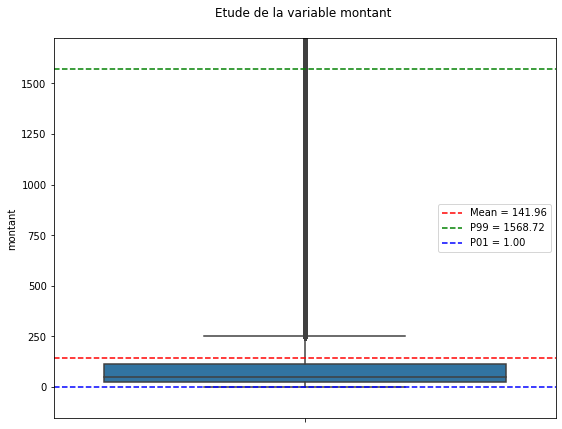

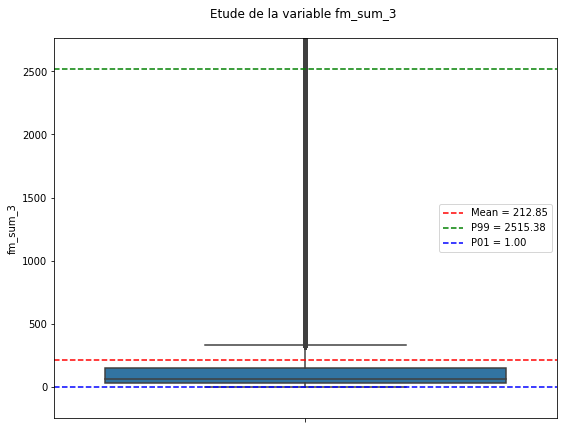

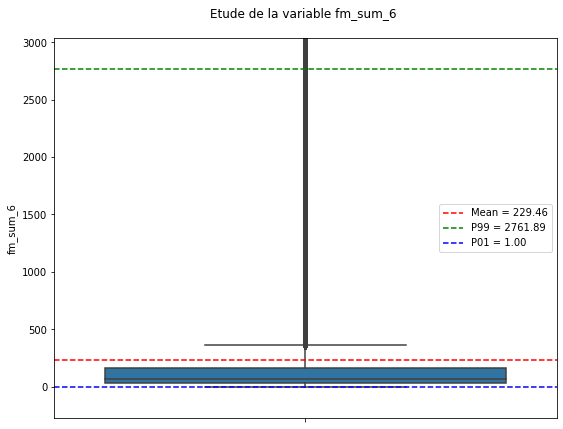

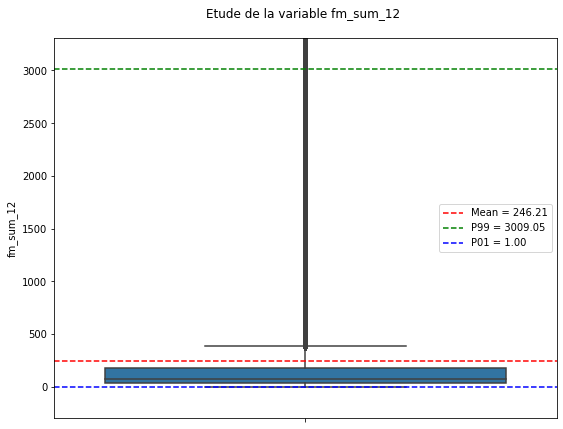

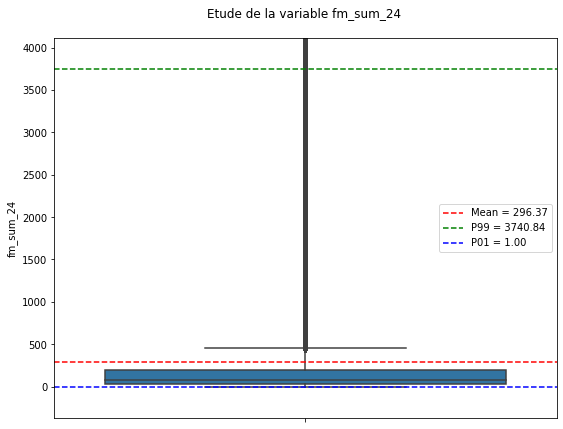

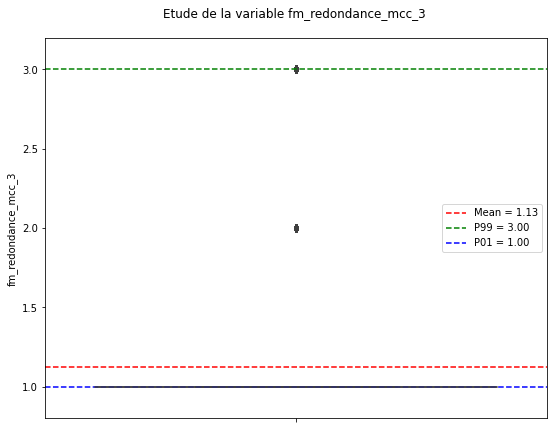

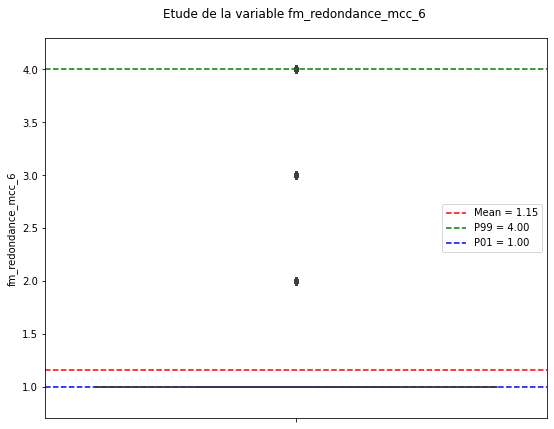

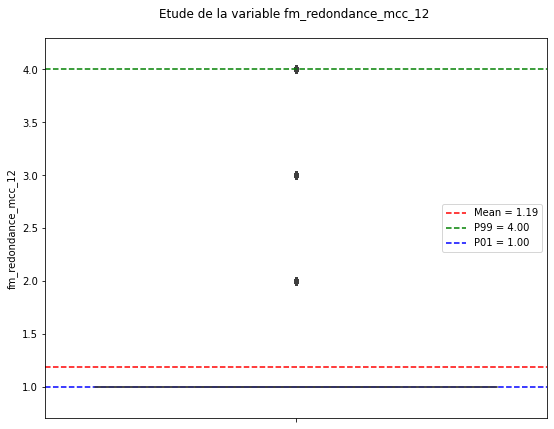

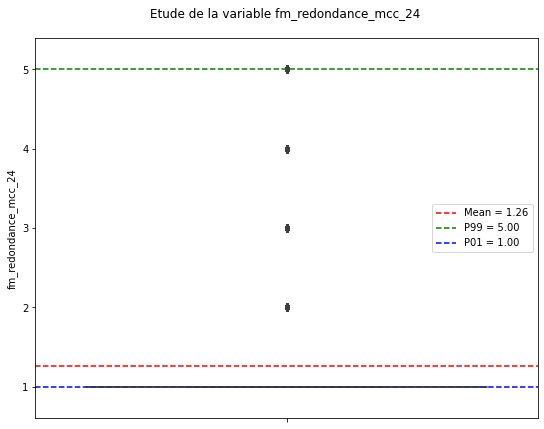

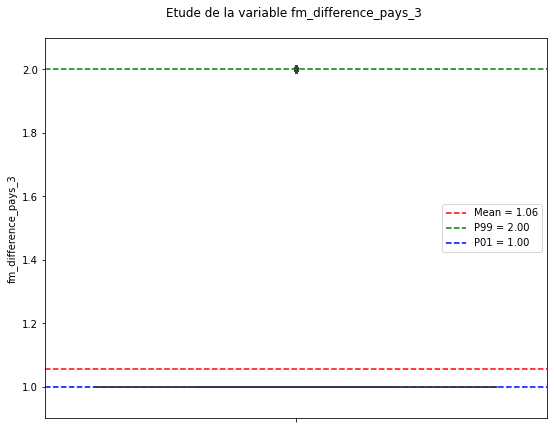

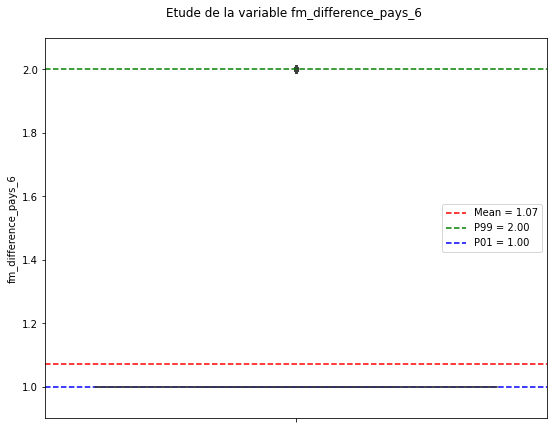

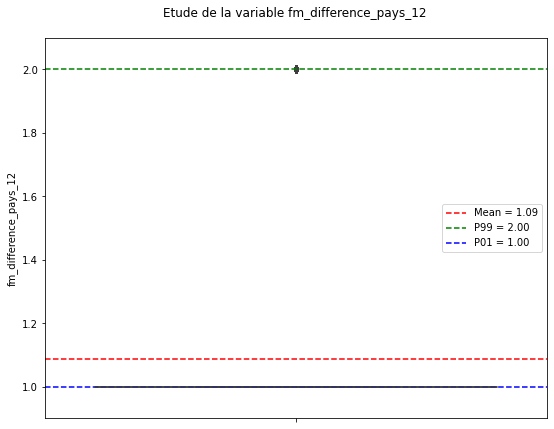

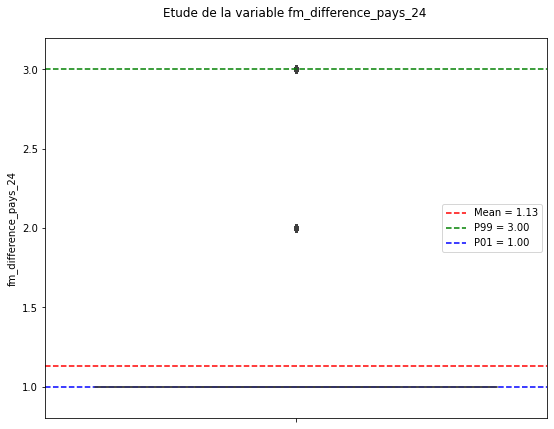

In [8]:
for var in var_num:
    boxplot_(var, cleaned_df, sample_fraction=1)

### Méthode 1: Identification des outliers IQR

La méthode de l'IQR est une approche courante pour identifier les valeurs aberrantes dans des données univariées. Elle utilise l'écart interquartile pour définir une plage de valeurs plausibles et identifie les observations qui sont en dehors de cette plage.

### Définition

L'IQR est défini comme la différence entre le troisième quartile (Q3) et le premier quartile (Q1) de la distribution des données. Les bornes inférieure et supérieure de la plage plausible sont définies comme suit :

- Limite inférieure : Q1 - 1,5 x IQR
- Limite supérieure : Q3 + 1,5 x IQR

Les observations en dehors de ces bornes sont considérées comme des valeurs aberrantes.

### Avantages

La méthode de l'IQR est relativement simple à comprendre et à implémenter. Elle est également assez robuste aux valeurs aberrantes, car elle utilise la médiane et l'écart interquartile pour calculer les bornes plausibles.

### Inconvénients

La méthode de l'IQR peut ne pas fonctionner correctement dans certaines distributions non symétriques, car elle suppose une distribution normale ou presque normale des données. Elle peut également ne pas fonctionner correctement si les données contiennent de nombreux points de données aberrants.


In [76]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.01)
    Q3 = df[column].quantile(0.99)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    return (len(df[(df[column] < low) | (df[column] > high)])/len(cleaned_df))*100

var_num_4 = var_num_1 + var_num_2

for i in var_num:
    # Détection des valeurs extrêmes 
    outliers = detect_outliers_iqr(cleaned_df, i)
    print(f"Valeurs extrêmes pour {i} (IQR):", round(outliers,2), '%')

Valeurs extrêmes pour montant (IQR): 0.18 %
Valeurs extrêmes pour fm_sum_3 (IQR): 0.23 %
Valeurs extrêmes pour fm_sum_6 (IQR): 0.23 %
Valeurs extrêmes pour fm_sum_12 (IQR): 0.23 %
Valeurs extrêmes pour fm_sum_24 (IQR): 0.23 %
Valeurs extrêmes pour fm_redondance_mcc_3 (IQR): 0.22 %
Valeurs extrêmes pour fm_redondance_mcc_6 (IQR): 0.21 %
Valeurs extrêmes pour fm_redondance_mcc_12 (IQR): 0.24 %
Valeurs extrêmes pour fm_redondance_mcc_24 (IQR): 0.22 %
Valeurs extrêmes pour fm_difference_pays_3 (IQR): 0.13 %
Valeurs extrêmes pour fm_difference_pays_6 (IQR): 0.21 %
Valeurs extrêmes pour fm_difference_pays_12 (IQR): 0.28 %
Valeurs extrêmes pour fm_difference_pays_24 (IQR): 0.17 %


In [113]:
def detect_outliers_iqr_data(df, column):
    Q1 = df[column].quantile(0.01)
    Q3 = df[column].quantile(0.99)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    return df[(df[column] < low) | (df[column] > high)]

outliers_index=[]
for i in var_num:
    # Détection des valeurs extrêmes 
    outliers = detect_outliers_iqr_data(cleaned_df, i)
    outliers_index+=list(outliers.index)

outliers_index = list(pd.DataFrame(outliers_index)[0].unique())    

cleaned_df['Outlier_IQR'] = False
cleaned_df.loc[outliers_index, 'Outlier_IQR'] = True

carte_outliers = list(cleaned_df[cleaned_df['Outlier_IQR']==True]['carte'])
IQR_carte_index = cleaned_df[cleaned_df['carte'].isin(carte_outliers)].index

count_unique_index = len(outliers_index)  
print(f"\nNombre totale de lignes correspondantes pour chaque outliers : {count_unique_index}")
count_unique_index = len(IQR_carte_index)  
print(f"\nNombre totale de lignes correspondantes pour chaque carte où au moins une transaction est un outliers: {count_unique_index}")  


Nombre totale de lignes correspondantes pour chaque outliers : 11416

Nombre totale de lignes correspondantes pour chaque carte où au moins une transaction est un outliers: 60909


In [112]:
cleaned_df['Outlier_IQR_carte'] = False
cleaned_df.loc[IQR_carte_index, 'Outlier_IQR_carte'] = True

cleaned_df_sans_outliers=cleaned_df[cleaned_df['Outlier_IQR_carte']==False]

count_1 = list(cleaned_df[["fraude"]].value_counts(normalize=False))
count_1 = (count_1[1]/count_1[0])*100
count_2 = list(cleaned_df_sans_outliers[["fraude"]].value_counts(normalize=False))
count_2 = (count_2[1]/count_2[0])*100

print(f'Fraudes avant supression des outliers : {round(count_1,2)} %')
print(f'Fraudes après supression des outliers : {round(count_2,2)} %')

Fraudes avant supression des outliers : 0.63 %
Fraudes après supression des outliers : 0.49 %


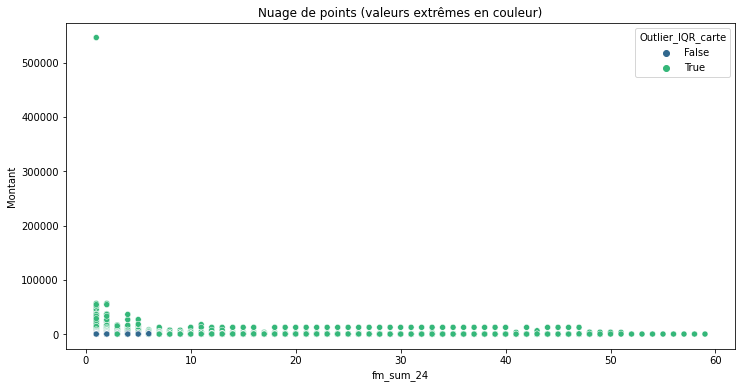

In [115]:
#Graphiques

# Créer un nuage de points (scatter plot) avec Seaborn en mettant en évidence les valeurs extrêmes

plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_df, x='fm_redondance_mcc_24', y='montant', hue='Outlier_IQR_carte', palette='viridis')
plt.xlabel('fm_sum_24')
plt.ylabel('Montant')
plt.title("Nuage de points (valeurs extrêmes en couleur)")
plt.show()

### Méthode 2: Identification des outliers avec Z-score

## Méthode du z-score

La méthode du z-score est une autre approche courante pour identifier les valeurs aberrantes dans des données univariées. Elle utilise l'écart à la moyenne pour définir une plage de valeurs plausibles et identifie les observations qui sont en dehors de cette plage.

### Définition

Le z-score est défini comme la différence entre une observation et la moyenne de la distribution des données, divisée par l'écart-type de la distribution :

z = (x - μ) / σ

Les bornes inférieure et supérieure de la plage plausible sont définies comme suit :

- Limite inférieure : μ - 3 x σ
- Limite supérieure : μ + 3 x σ

Les observations en dehors de ces bornes sont considérées comme des valeurs aberrantes.

### Avantages

La méthode du z-score est également relativement simple à comprendre et à implémenter. Elle est également assez robuste aux valeurs aberrantes, car elle utilise la moyenne et l'écart-type pour calculer les bornes plausibles.

### Inconvénients

Comme pour la méthode de l'IQR, la méthode du z-score peut ne pas fonctionner correctement dans certaines distributions non symétriques. Elle peut également ne pas fonctionner correctement si les données contiennent de nombreux points de données aberrants.

In [109]:
# Fonction pour détecter les outliers en utilisant le z-score
def detect_outliers_zscore(data, column, threshold=10):
    z_scores = (data[column] - data[column].mean()) / data[column].std()
    return data[np.abs(z_scores) > threshold]

outliers_index=[]
z=0
for i in var_num:
    
    # Trouver les outliers pour la colonne 'PRICE'
    outliers = detect_outliers_zscore(cleaned_df, i)
    outliers_index+=list(outliers.index)
    # Afficher les outliers
    z+=len(outliers)
    print(f"Outliers détectés pour la variable {i}: {len(outliers)}")

outliers_index = list(pd.DataFrame(outliers_index)[0].unique())    

cleaned_df['Outlier_z'] = False
cleaned_df.loc[outliers_index, 'Outlier_z'] = True

carte_outliers = list(cleaned_df[cleaned_df['Outlier_z']==True]['carte'])
z_carte_index = cleaned_df[cleaned_df['carte'].isin(carte_outliers)].index

count_unique_index = len(outliers_index)  
print(f"\nNombre totale de lignes correspondantes pour chaque outliers : {count_unique_index}")
count_unique_index = len(z_carte_index)  
print(f"\nNombre totale de lignes correspondantes pour chaque carte où au moins une transaction est un outliers: {count_unique_index}")

Outliers détectés pour la variable montant: 532
Outliers détectés pour la variable fm_sum_3: 613
Outliers détectés pour la variable fm_sum_6: 661
Outliers détectés pour la variable fm_sum_12: 730
Outliers détectés pour la variable fm_sum_24: 517
Outliers détectés pour la variable fm_redondance_mcc_3: 1520
Outliers détectés pour la variable fm_redondance_mcc_6: 2389
Outliers détectés pour la variable fm_redondance_mcc_12: 1800
Outliers détectés pour la variable fm_redondance_mcc_24: 1492
Outliers détectés pour la variable fm_difference_pays_3: 1524
Outliers détectés pour la variable fm_difference_pays_6: 1239
Outliers détectés pour la variable fm_difference_pays_12: 1925
Outliers détectés pour la variable fm_difference_pays_24: 1981

Nombre totale de lignes correspondantes pour chaque outliers : 6692

Nombre totale de lignes correspondantes pour chaque carte où au moins une transaction est un outliers: 33313


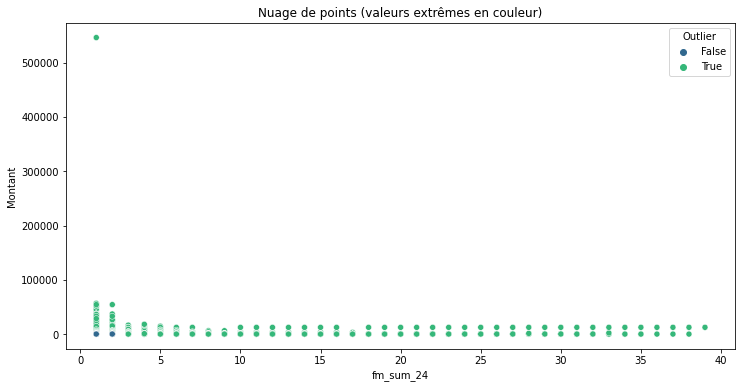

In [130]:
#Graphiques

# Ajouter une colonne pour indiquer si la valeur est extrême
cleaned_df['Outlier_z_carte'] = False
cleaned_df.loc[z_carte_index, 'Outlier_z_carte'] = True

# Créer un nuage de points (scatter plot) avec Seaborn en mettant en évidence les valeurs extrêmes

plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_df, x='fm_redondance_mcc_3', y='montant', hue='Outlier', palette='viridis')
plt.xlabel('fm_redondance_mcc_3')
plt.ylabel('Montant')
plt.title("Nuage de points (valeurs extrêmes en couleur)")
plt.show()

In [118]:
cleaned_df_sans_outliers=cleaned_df[cleaned_df['Outlier_z_carte']==False]

count_1 = list(cleaned_df[["fraude"]].value_counts(normalize=False))
count_1 = (count_1[1]/count_1[0])*100
count_2 = list(cleaned_df_sans_outliers[["fraude"]].value_counts(normalize=False))
count_2 = (count_2[1]/count_2[0])*100

print(f'Fraudes avant supression des outliers : {round(count_1,2)} %')
print(f'Fraudes après supression des outliers : {round(count_2,2)} %')

Fraudes avant supression des outliers : 0.63 %
Fraudes après supression des outliers : 0.53 %


### Méthode 3: Isolation Forest

L'Isolation Forest est une méthode d'apprentissage automatique non supervisée pour identifier les valeurs aberrantes dans des données univariées et multivariées. **Elle fonctionne en construisant plusieurs arbres de décision aléatoires** et en calculant un score d'anomalie pour chaque observation en fonction de la profondeur moyenne à laquelle elle est isolée des autres observations.

### Définition

**L'Isolation Forest est basée sur l'idée que les valeurs aberrantes sont plus faciles à isoler que les valeurs normales**. Elle construit plusieurs arbres de décision aléatoires et divise les données en sous-ensembles aléatoires à chaque nœud. L'algorithme isole les observations en fonction de la profondeur moyenne à laquelle elles sont isolées par rapport aux autres observations. Les observations qui sont isolées plus rapidement que la moyenne sont considérées comme des valeurs aberrantes.

### Avantages

**L'Isolation Forest est capable de détecter les valeurs aberrantes dans des données univariées et multivariées**. Elle fonctionne également bien avec des **distributions non symétriques** et est assez robuste aux valeurs aberrantes. 


### Inconvénients

L'Isolation Forest peut être sensible aux paramètres tels que le nombre d'arbres et la taille des sous-échantillons. De plus, elle peut parfois être difficile à interpréter, en particulier pour les données multivariées.


In [128]:
from sklearn.ensemble import IsolationForest

data = cleaned_df[var_num].copy()

# Appliquer l'Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outlier_labels = iso_forest.fit_predict(data)

data['carte']=cleaned_df['carte']

# Ajouter les labels d'anomalie au DataFrame
data['Outlier'] = outlier_labels

# Afficher les outliers
outliers = data[data['Outlier'] == -1]

carte_outliers = list(data[data['Outlier']==-1]['carte'])
iso_carte_index = data[data['carte'].isin(carte_outliers)].index

count_unique_index = len(outliers)  
print(f"\nNombre totale de lignes correspondantes pour chaque outliers : {count_unique_index}")
count_unique_index = len(iso_carte_index)  
print(f"\nNombre totale de lignes correspondantes pour chaque carte où au moins une transaction est un outliers: {count_unique_index}")

Outliers détectés pour la variable: 114957

Nombre totale de lignes correspondantes pour chaque outliers : 11416

Nombre totale de lignes correspondantes pour chaque carte où au moins une transaction est un outliers: 555556


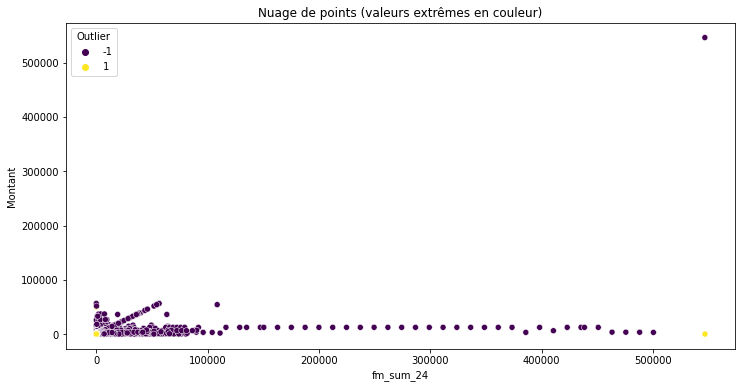

In [137]:
#Graphiques
data['fraude']=cleaned_df['fraude']
# Créer un nuage de points (scatter plot) avec Seaborn en mettant en évidence les valeurs extrêmes

# Ajouter une colonne pour indiquer si la valeur est extrême
data['Outlier_iso_carte'] = False
data.loc[iso_carte_index, 'Outlier_iso_carte'] = True

plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='fm_sum_24', y='montant', hue='Outlier', palette='viridis')
plt.xlabel('fm_sum_24')
plt.ylabel('Montant')
plt.title("Nuage de points (valeurs extrêmes en couleur)")
plt.show()

In [138]:
cleaned_df_sans_outliers=data[data['Outlier_iso_carte']==1]

count_1 = list(cleaned_df[["fraude"]].value_counts(normalize=False))
count_1 = (count_1[1]/count_1[0])*100
count_2 = list(cleaned_df_sans_outliers[["fraude"]].value_counts(normalize=False))
count_2 = (count_2[1]/count_2[0])*100

print(f'Fraudes avant supression des outliers : {round(count_1,2)} %')
print(f'Fraudes après supression des outliers : {round(count_2,2)} %')

Fraudes avant supression des outliers : 0.63 %
Fraudes après supression des outliers : 1.11 %


# Solutions pour traiter les valeurs extrêmes

| Type de valeur aberrante | Solutions pour les traiter                                                                                              |
|--------------------------|------------------------------------------------------------------------------------------------------------------------|
| Erreur                   | 1. Correction de l'erreur si possible (ex. erreurs de saisie)                                                           |
|                          | 2. Suppression de l'observation si la correction n'est pas possible et si l'erreur est clairement une anomalie 
|                          | 3. Remplacer par une valeur manquante et imputer avec les techniques d'imputation
|                          |      |
| Extrême                  | 1. Transformation des données (ex. logarithmique, racine carrée) pour réduire l'impact des valeurs extrêmes             |
|                          | 2. Winsorisation : remplacer les valeurs extrêmes par des percentiles spécifiques (ex. 1er et 99e percentiles)          |
|                         
|                          | 3. Utiliser des modèles d'apprentissage automatique robustes aux valeurs extrêmes (ex. modèles basés sur les rangs)     |
|                          | 4. Discrétiser la variable   |
|                          | 5. Faire le modèle avec et sans les valeurs extrêmes et analyser l'impact   |

- Choisir la méthode qui nous parrait la plus a adapter
- Et voir laquelle des solutions est la plus adapter (préférence pour la 5 qui est souvent recommander)

## II - Sélection de variables pour la modélisation

In [13]:
# Aperçu du jeu de données

pd.options.display.max_columns = None
pd.options.display.max_rows = None

cleaned_df.head(10)

,carte,pays,date,heure,dateheure,coderep,mcc,montant,fraude,fm_velocity_condition_3,fm_velocity_condition_6,fm_velocity_condition_12,fm_velocity_condition_24,fm_sum_3,fm_sum_6,fm_sum_12,fm_sum_24,fm_redondance_mcc_3,fm_redondance_mcc_6,fm_redondance_mcc_12,fm_redondance_mcc_24,fm_difference_pays_3,fm_difference_pays_6,fm_difference_pays_12,fm_difference_pays_24
0,0.0,840,2003-12-02,2024-06-24 17:47:52,2003-12-02,15,5812,69.25,0.0,0,0,0,0,69.25,69.25,69.25,69.25,1,1,1,1,1,1,1,1
1,1.0,158,2003-11-25,2024-06-24 06:00:20,2003-11-25,15,5311,1.00,0.0,0,0,0,0,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1
2,2.0,826,2003-11-12,2024-06-24 14:10:57,2003-11-12,15,5211,516.95,0.0,0,0,0,0,516.95,516.95,516.95,516.95,1,1,1,1,1,1,1,1
3,3.0,840,2003-11-07,2024-06-24 03:41:55,2003-11-07,14,7399,0.01,0.0,0,0,0,0,0.01,0.01,0.01,0.01,1,1,1,1,1,1,1,1
4,4.0,158,2003-11-23,2024-06-24 05:07:03,2003-11-23,15,5311,1.00,0.0,0,0,0,0,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1
5,5.0,158,2003-11-17,2024-06-24 02:26:28,2003-11-17,15,5311,1.00,0.0,0,0,0,0,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1
6,6.0,840,2003-12-03,2024-06-24 02:52:14,2003-12-03,15,5969,48.46,0.0,0,0,0,0,48.46,48.46,48.46,48.46,1,1,1,1,1,1,1,1
7,6.0,840,2003-12-04,2024-06-24 02:36:37,2003-12-04,15,5969,48.32,0.0,0,0,0,0,48.32,48.32,48.32,96.50,1,1,1,2,1,1,1,1
8,6.0,840,2003-12-05,2024-06-24 02:46:17,2003-12-05,15,5969,48.32,0.0,0,0,0,0,48.32,48.32,48.32,48.32,1,1,1,1,1,1,1,1
9,6.0,840,2003-12-06,2024-06-24 02:30:31,2003-12-06,15,5969,48.18,0.0,0,0,0,0,48.18,48.18,48.18,96.78,1,1,1,2,1,1,1,1


In [ ]:
# Supprimer  "dateheure"
# Les variables de types objects vont potentiellement poser problème sur certains modèles (je pense notament à la régression logistique)
# Soit on les supprime, soit on change le format de manière à pouvoir les intégrer partout
# Ou on s'en occuppe au moment de la modélisation en faisant du cas par cas, selon les modèles

In [140]:
cleaned_df.drop(columns=['dateheure'],inplace=True)

In [142]:
cleaned_df.drop(columns=['heure','date'],inplace=True)

In [144]:
cleaned_df.drop(columns=['Outlier','Outlier_IQR','Outlier_IQR_carte','Outlier_z','Outlier_z_carte','Outlier_iso_carte'],inplace=True)

In [145]:
# Aperçu du jeu de données

pd.options.display.max_columns = None
pd.options.display.max_rows = None

cleaned_df.head(10)

,carte,pays,coderep,mcc,montant,fraude,fm_velocity_condition_3,fm_velocity_condition_6,fm_velocity_condition_12,fm_velocity_condition_24,fm_sum_3,fm_sum_6,fm_sum_12,fm_sum_24,fm_redondance_mcc_3,fm_redondance_mcc_6,fm_redondance_mcc_12,fm_redondance_mcc_24,fm_difference_pays_3,fm_difference_pays_6,fm_difference_pays_12,fm_difference_pays_24
0,0.0,840,15,5812,69.25,0.0,0,0,0,0,69.25,69.25,69.25,69.25,1,1,1,1,1,1,1,1
1,1.0,158,15,5311,1.00,0.0,0,0,0,0,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1
2,2.0,826,15,5211,516.95,0.0,0,0,0,0,516.95,516.95,516.95,516.95,1,1,1,1,1,1,1,1
3,3.0,840,14,7399,0.01,0.0,0,0,0,0,0.01,0.01,0.01,0.01,1,1,1,1,1,1,1,1
4,4.0,158,15,5311,1.00,0.0,0,0,0,0,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1
5,5.0,158,15,5311,1.00,0.0,0,0,0,0,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1
6,6.0,840,15,5969,48.46,0.0,0,0,0,0,48.46,48.46,48.46,48.46,1,1,1,1,1,1,1,1
7,6.0,840,15,5969,48.32,0.0,0,0,0,0,48.32,48.32,48.32,96.50,1,1,1,2,1,1,1,1
8,6.0,840,15,5969,48.32,0.0,0,0,0,0,48.32,48.32,48.32,48.32,1,1,1,1,1,1,1,1
9,6.0,840,15,5969,48.18,0.0,0,0,0,0,48.18,48.18,48.18,96.78,1,1,1,2,1,1,1,1


## III - Formatage de la base de données 

In [ ]:
# Tronquer "heure" pour n'avoir que l'heure et sûrement changer le format ou type de la variable heure ?
# Les variables de types objects vont potentiellement poser problème sur certains modèles (je pense notament à la régression logistique)

In [149]:
# Aperçu du jeu de données

pd.options.display.max_columns = None
pd.options.display.max_rows = None

cleaned_df.head(10)

,carte,pays,coderep,mcc,montant,fraude,fm_velocity_condition_3,fm_velocity_condition_6,fm_velocity_condition_12,fm_velocity_condition_24,fm_sum_3,fm_sum_6,fm_sum_12,fm_sum_24,fm_redondance_mcc_3,fm_redondance_mcc_6,fm_redondance_mcc_12,fm_redondance_mcc_24,fm_difference_pays_3,fm_difference_pays_6,fm_difference_pays_12,fm_difference_pays_24
0,0.0,840,15,5812,69.25,0.0,0,0,0,0,69.25,69.25,69.25,69.25,1,1,1,1,1,1,1,1
1,1.0,158,15,5311,1.00,0.0,0,0,0,0,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1
2,2.0,826,15,5211,516.95,0.0,0,0,0,0,516.95,516.95,516.95,516.95,1,1,1,1,1,1,1,1
3,3.0,840,14,7399,0.01,0.0,0,0,0,0,0.01,0.01,0.01,0.01,1,1,1,1,1,1,1,1
4,4.0,158,15,5311,1.00,0.0,0,0,0,0,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1
5,5.0,158,15,5311,1.00,0.0,0,0,0,0,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1
6,6.0,840,15,5969,48.46,0.0,0,0,0,0,48.46,48.46,48.46,48.46,1,1,1,1,1,1,1,1
7,6.0,840,15,5969,48.32,0.0,0,0,0,0,48.32,48.32,48.32,96.50,1,1,1,2,1,1,1,1
8,6.0,840,15,5969,48.32,0.0,0,0,0,0,48.32,48.32,48.32,48.32,1,1,1,1,1,1,1,1
9,6.0,840,15,5969,48.18,0.0,0,0,0,0,48.18,48.18,48.18,96.78,1,1,1,2,1,1,1,1


In [150]:
# Tableau récapitulatifs sur les modalités de chaques variables

df_dtypes = cleaned_df.dtypes.reset_index().rename(columns={'index':'Champ',0:'Type'})
df_dtypes

for i in cleaned_df.columns:
    df_dtypes.loc[df_dtypes['Champ']==i,'Modalités'] = str(sorted(cleaned_df[i].unique().tolist()))
    df_dtypes.loc[df_dtypes['Champ']==i,'NbDistinctVal'] = cleaned_df[i].nunique()
    
df_dtypes

,Champ,Type,Modalités,NbDistinctVal
0,carte,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",198044.0
1,pays,object,"['008', '012', '020', '028', '031', '032', '03...",167.0
2,coderep,object,"['00', '02', '05', '07', '14', '15', '30', '41...",15.0
3,mcc,object,"['0000', '0001', '0004', '0100', '0596', '0741...",661.0
4,montant,float64,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...",81202.0
5,fraude,float64,"[0.0, 1.0]",2.0
6,fm_velocity_condition_3,int64,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",47.0
7,fm_velocity_condition_6,int64,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",82.0
8,fm_velocity_condition_12,int64,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",111.0
9,fm_velocity_condition_24,int64,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",130.0


In [151]:
#Exportation des données retraitées

cleaned_df.to_parquet('../data/retreated_data.parquet')